<a href="https://colab.research.google.com/github/DieGoSoc/Supervised-Learning-IEBS-Project/blob/main/DiegoProyectoFinalAS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROYECTO AS: Aprendizaje supervisado para evaluar la salud de un bebé durante el parto**


##Diego Andrés Dorrego Carril

#Introducción

El cardiotocógrafo fetal (CTG) sirve como herramienta de seguimiento durante el parto para evaluar el estado de salud del bebé durante el nacimiento. Con ello pueden llegar a tratarse distintas complicaciones durante el parto que pueden derivar en consecuencias como la mortalidad perinatal.

Trataremos con una base de datos donde se recogen datos de 2.162 cardiotocogramas fetales (CTG). Para cada CTG se representan un conjunto de variables explicativas que va a permitir estimar el estado fetal (target) en normal o anormal. Se realizarán ajustes de los algoritmos de clasificación de Naive Bayes y SVM para intentar predecir, en base a unas variables explicativas, el estado del feto. 

#FASE 1: Carga de datos y análisis descriptivo

En primer lugar, cargamos las librerías necesarias y la base de datos con la que trabajaremos. 

In [ ]:
#Cargamos librerías para el análisis estadístico
import numpy as np
import pandas as pd

#Cargamos librerías para la visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as xp


In [ ]:
#Cargamos el fichero y comprobamos si se ha cargado correctamente
file = '/content/ASI_casoPractico.csv'
data = pd.read_csv(file, sep = ';')
data.head()

,ID,b,e,LBE,AC,FM,UC,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,1,240,357,120,0,0,0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,1
1,2,5,632,132,4,0,4,17,2.1,0,...,68,198,6,1,141,136,140,12,0,0
2,3,177,779,133,2,0,5,16,2.1,0,...,68,198,5,1,141,135,138,13,0,0
3,4,411,1192,134,2,0,6,16,2.4,0,...,53,170,11,0,137,134,137,13,1,0
4,5,533,1147,132,4,0,5,16,2.4,0,...,53,170,9,0,137,136,138,11,1,0


##Clasificación de variables según su tipo

Un buen análisis descriptivo pasa por entender bien el conjunto de datos, y esto, a su vez, pasa por conocer bien las variables que trataremos. Conocer de qué tipo son (cualitativas o cuantitativas, discretas o continuas) es fundamental para entender la esencia misma de los datos que estamos tratando y poder así desarrollar correctamente futuros análisis y modelizaciones.


Podemos empezar por conocer con qué tipo de variables estamos trabajando si contamos con información adicional. En nuestro caso, contamos con un PDF en el que podemos ver a qué hace referencia cada una de las variables: 


1. ID: ID Observación
2. b: Tiempo de inicio de la monitorización
3. e: Tiempo de finalización de la monitorización
4. LBE: Frecuencia cardiaca fetal de base (latidos por minuto)
5. AC: Número de aceleraciones por minuto
6. FM: Número de movimientos fetales por segundo.
7. UC: Número de contracciones uterinas por segundo.
8. ASTV: Porcentaje de tiempo con variabilidad anormal a corto plazo.
9. MSTV: Valor medio de variabilidad a corto plazo.
10. ALTV: Porcentaje de tiempo con variabilidad anormal a largo plazo. 
11. DL: Número de desaceleraciones ligeras por segundo
12. DS: Número de desaceleraciones severas por segundo
13. DP: Número de desaceleraciones prolongadas por segundo
14. DR: Número de desaceleraciones repetitivas por segundo.
15. Width: Ancho de histograma FHR
16. Min: Mínimo (frecuencia baja) de histograma FHR
17. Max: Máximo (frecuencia alta) de histograma FHR
18. Nmax: Número de picos en el histograma
19. Nzeros: Número de ceros en el histograma
20. Mode: Modo de histograma
21. Mean: Media de histograma
22. Variance: Varianza de histograma
23. Tendency: Tendencia de histograma
24. Target (variable dependiente): Código de clase de estado fetal



Contams con un PDF informativo, pero no nos aparece de qué tipo son las variables. Pero solamente con las descripciones de la variables ya podemos intuir de qué tipo son muchas de ellas. Por ejemplo, parece ser que la mayoría de ellas son cuantitativas. Igualmente, podemos utilizar la función `info` y `agg (nunique)` para tener una información más completa:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2126 non-null   int64  
 1   b         2126 non-null   int64  
 2   e         2126 non-null   int64  
 3   LBE       2126 non-null   int64  
 4   AC        2126 non-null   int64  
 5   FM        2126 non-null   int64  
 6   UC        2126 non-null   int64  
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  DL        2126 non-null   int64  
 12  DS        2126 non-null   int64  
 13  DP        2126 non-null   int64  
 14  DR        2126 non-null   int64  
 15  Width     2126 non-null   int64  
 16  Min       2126 non-null   int64  
 17  Max       2126 non-null   int64  
 18  Nmax      2126 non-null   int64  
 19  Nzeros    2126 non-null   int64  
 20  Mode      2126 non-null   int6

Con la función `info` vemos que todas las variables son `int64` o `float64`. Esto quiere decir que no hay variables cualitativas, es decir, variables con contenido cualitativo. Pero tenemos que tener en cuenta que lo que vemos en el dataset puede ser la codificación/cuantificación de las variables cualitativas. Es decir, Python detecta el valor de la variable y concluye que es un número, pero ese número puede ser la codificación que hace referencia a una etiqueta cualitativa. Esto es lo que parece ocurrir con la variable `Target`. 

Vamos a utilizar la función `agg (nunique)`, que nos dice cuántos valores diferentes hay por cada variable:

In [ ]:
data.agg(['nunique']).transpose()

,nunique
ID,2126
b,979
e,1064
LBE,48
AC,22
FM,96
UC,19
ASTV,75
MSTV,57
ALTV,87


Como podemos observar, la cantidad de valores de ciertas variables parece indicarnos que son cualitativas, como es el caso de `Target`, que contiene solamente 2 valores, correspondiendo a los 2 códigos que hacen referencia al estado fetal. 

También podríamos sospechar que pudiese haber variables cualitativas politómicas como en el caso de `DS`, `DP` o `Tendency` por los pocos valores que toman, aunque viendo la descripción de las variables vemos que, definitivamente, parecen ser cuantitativas. Hay que tener en cuenta que pueden ser cuantitativas y discretas, y que eso también puede ser motivo para encontrarnos con pocos de valores. 

También vemos casos de variables que podrían ser eliminadas, como el caso de `DR` que no es una variable, sino una constante, pues toma el mismo valor en cada uno de los casos. Esta variable no aporte ningún tipo de información así que podríamos prescindir de ella. 

Otra forma de conocer la naturaleza de las variables es a través de la función `describe`:



In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,2126.0,1063.500000,613.867657,1.0,532.25,1063.5,1594.75,2126.0
b,2126.0,878.439793,894.084748,0.0,55.00,538.0,1521.00,3296.0
e,2126.0,1702.877234,930.919143,287.0,1009.00,1241.0,2434.75,3599.0
LBE,2126.0,133.303857,9.840844,106.0,126.00,133.0,140.00,160.0
AC,2126.0,2.722484,3.560850,0.0,0.00,1.0,4.00,26.0
FM,2126.0,7.241298,37.125309,0.0,0.00,0.0,2.00,564.0
UC,2126.0,3.659925,2.847094,0.0,1.00,3.0,5.00,23.0
ASTV,2126.0,46.990122,17.192814,12.0,32.00,49.0,61.00,87.0
MSTV,2126.0,1.332785,0.883241,0.2,0.70,1.2,1.70,7.0
ALTV,2126.0,9.846660,18.396880,0.0,0.00,0.0,11.00,91.0


Aquí podemos comprobar qué tipo de datos tenemos. En caso de la variable `Target`, por ejemplo, vemos que los únicos valores que admite son 0 y 1, habiendo solo dos valores distintos en el conjunto de datos y viendo que el mínimo y máximo son 0 y 1. 
En el caso de la variable `DS`vemos que ocurre lo mismo. 

Teniendo en cuenta la descripción de las variables y todos los demás análisis, podríamos clasificar las variables de la siguiente manera: 

**Cuantitativas discretas:**

ID, b, e, LBE, AC, FM, UC, DL, DS, DP, DR, Mode, Tendency.

**Cuantitativas continuas:**

ASTV, MSTV, ALTV, Min, Max, Nmax, Nzeros, Mean, Median, Variance.

**Cualitativas (dicotómicas)**

Target. 

Habiendo analizado las variables, podemos concluir, de forma preliminar, que podemos prescindir de algunas de ellas. Por ejemplo, la variable `ID` solamente es el número de registro de cada caso. La variable `DR` es una constante, no cambia en ningún momento, así que no aportaría valor explicativo. Por otro lado, las variables `b` y `e` solo indican inicio y finalización de la monitorización, por lo que tampoco parece que aporten demasiado. Puesto que su incoroporación en la base de datos no aporta información a efectos prácticos, más tarde se optará por eliminar estas variables del resto del proyecto. 

##Analizando el Target o variable objetivo



Podemos comenzar por volver a aplicar la función `describe`y `nunique`anteriormente mostrada centrándonos esta vez en el `Target`:



In [ ]:
data[['Target']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Target,2126.0,0.221543,0.415383,0.0,0.0,0.0,0.0,1.0


In [ ]:
data[['Target']].agg(['nunique']).transpose()

,nunique
Target,2


De aquí podemos sacar cosas interesantes, como que la variable es dicotómica y que el valor mayoritario es el 0.

Vemos que la media de la variable `Target`es 0.221543, esto significa que el porcentaje de estados fetales anormales es de 22.15% y el porcentaje de estados fetales normales es (1 - 0.221543)*100, es decir, 77.85%. Esto es así porque la variable, como ya vimos en el punto anterior, es una variable dicotómica codificada con 0 y 1. Si asumimos que el código 0 corresponde a estados de fetos normales, entonces la media nos dará la proporción de fetos anormales (sumas de valores igual a 1 dividido el total). 

Asumimos que los fetos normales son 0 ya que el 0 es el valor más usual en la variable, por lo que, asumiendo también que no hay sesgo en esa variable, se corresponería más a esa "normalidad" que a la "anormalidad". 

Podemos también hacer un análisis visual obteniendo un gráfico para las freucencias relativas:

0    1655
1     471
Name: Target, dtype: int64


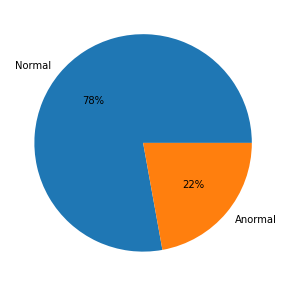

In [ ]:
a, b = data['Target'].value_counts()
plt.figure(figsize = (13,5))
plt.subplot(121)
plt.pie([a,b], labels = ['Normal', 'Anormal'], autopct = '%1.0f%%')
print(data['Target'].value_counts())

Tal y como habíamos adelantado anteriormente, el 78% de los casos corresponden al valor 0 (Normal) mientras que el 22% restante corresponde a la categoría "Anormal". 

##Analizando variables explicativas: Medidas de centralización, localización y dispersión

Algo que no puede faltar en un análisis de datos son medidas de centralización, localización y dispersión. A continuación obtendremos las medidas de centralización, localización y dispersión de las variables explicativas de la base de datos. Como ya adelantábamos anteriormente, dejaremos fuera las variables `Id`, `DR`, `b`, `e` y a la variable objetivo `Target`:

In [ ]:
data_var_exp = data.drop(['ID', 'DR', 'Target', 'b', 'e'], axis = 1)
data_var_exp.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LBE,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.0,160.0
AC,2126.0,2.722484,3.560850,0.0,0.0,1.0,4.0,26.0
FM,2126.0,7.241298,37.125309,0.0,0.0,0.0,2.0,564.0
UC,2126.0,3.659925,2.847094,0.0,1.0,3.0,5.0,23.0
ASTV,2126.0,46.990122,17.192814,12.0,32.0,49.0,61.0,87.0
MSTV,2126.0,1.332785,0.883241,0.2,0.7,1.2,1.7,7.0
ALTV,2126.0,9.846660,18.396880,0.0,0.0,0.0,11.0,91.0
MLTV,2126.0,8.187629,5.628247,0.0,4.6,7.4,10.8,50.7
DL,2126.0,1.570085,2.499229,0.0,0.0,0.0,3.0,16.0
DS,2126.0,0.003293,0.057300,0.0,0.0,0.0,0.0,1.0


Algo que podríamos destacar es la elevada dispersión, sobre todo en las variables `FM` y `ALTV`. 

Vemos también que es posible que, atendiendo a al rango de las variables, haya valores outliers. Podemos verlo atendiendo a los máximos, mínimos y cuartiles de cada una de las variables. En el caso de la variable `FM`, por ejemplo, vemos que la media es de 7.241, la mediana es 0, y el máximo es 564. Claramente esta variable posee valores atípicos. 

Para un mejor análisis de la distribución de las variables, podemos utilizar histogramas:

##Histograma para las variables explicativas

El análisis preliminar de los datos pasa por buenas visualizaciones que nos ayuden a comprender nuestro dataframe. Los histogramas son fundamentales para analizar la distribución de variables cuantitativas:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f690f1779d0>,
      dtype=object)

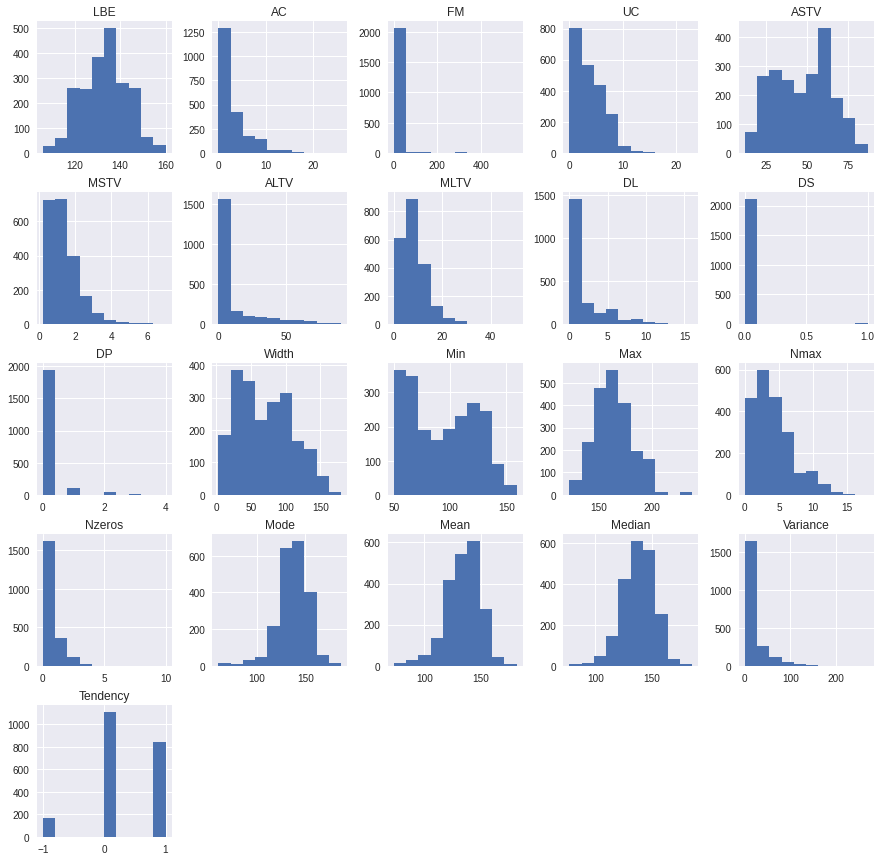

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15,15))
plt.style.use('seaborn')
data_var_exp.loc[:].hist(ax=ax)

Lo que podemos comporbar aquí, por ejemplo, es como se distribuye cada variable en base a medidas de centralidad y dispersión como la media o la mediana. En el caso de la variable `LBE` o `Mean`, vemos que la mediana de la distribución más o menos coincide con la media, asemejándose su distribución a una campana de Gauss. Sin embargo, en el caso de la variables como `FM`, vemos que la media está por encima de la mediana, lo que indica la existencia de acumulación de valores pequeños y la posible existencia de valores atípicos. 

Y es que los histogramas son tambien útiles para detectar valores atípicos. En el caso de variables como `FM`, `DS`, `DP` o `Variance` podemos observar que en su distribución aparecen pequeñas barras de histograma muy a la derecha del eje x y alejadas del grueso de la distribución. Eso indica que la variable toma valores extremos.

También vemos claramente cuando una variable es categórica o discreta, como en el caso de `Tendency`. 



##Gráfico boxplot para las variables explicativas

Con la visualización de histogramas para cada variable explicativa ya pudimos observar la distribución de estas variables e incluso la existencia de valores atípicos. A continuación obtendremos gráficos boxplot, con los que también podemos ver la distribución de las variables y detectar outliers de una forma más precisa:

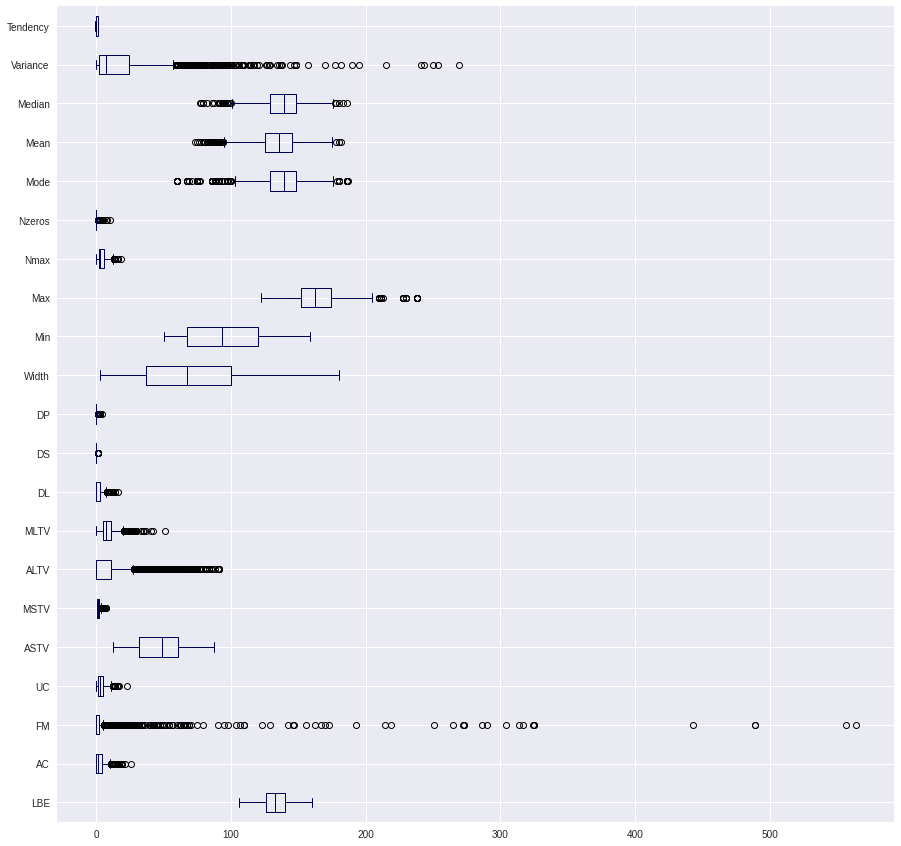

In [ ]:
data.boxplot = data.drop(['b', 'e', 'ID', 'Target', 'DR'], axis = 1)
plt.figure(figsize = (15,15))
data_box_plot = data.boxplot.boxplot(vert = False, color = '#000054')

Como vemos, parece haber valores atípicos en muchas variables, siendo la variable `FM` un caso claramente destacable. Las únicas variables potencialmente explicativas que parecen tener una distribución sin outliers son las variables de `Tendency`, `ASTV`, `Min`, `Width` y `LBE`. Tener esta información ya disponible en el análisis exploratorio nos ayudará posteriormente para realizar una mejor modelización. Conforme vaya avanzando el análisis, veremos si es preciso realizar modificaciones importantes, como pueda ser el categorizar ciertas variables cuantitativas o sustituir ciertos valores outliers por medidas de centralización. 

##Correlación entre variables

Eliminamos definitivamente las variables que hemos visto que no aportaban mucha información de nuestro conjunto de datos original:

In [ ]:
data = data.drop(['ID', 'b', 'e', 'DR'], axis = 1)

A continuación, indagamos en la correlación entre las variables del conjunto de datos, centrándonos en las relaciones bivariadas entre las variables explicativas y el target. Para ello usamos la matriz de correlaciones:

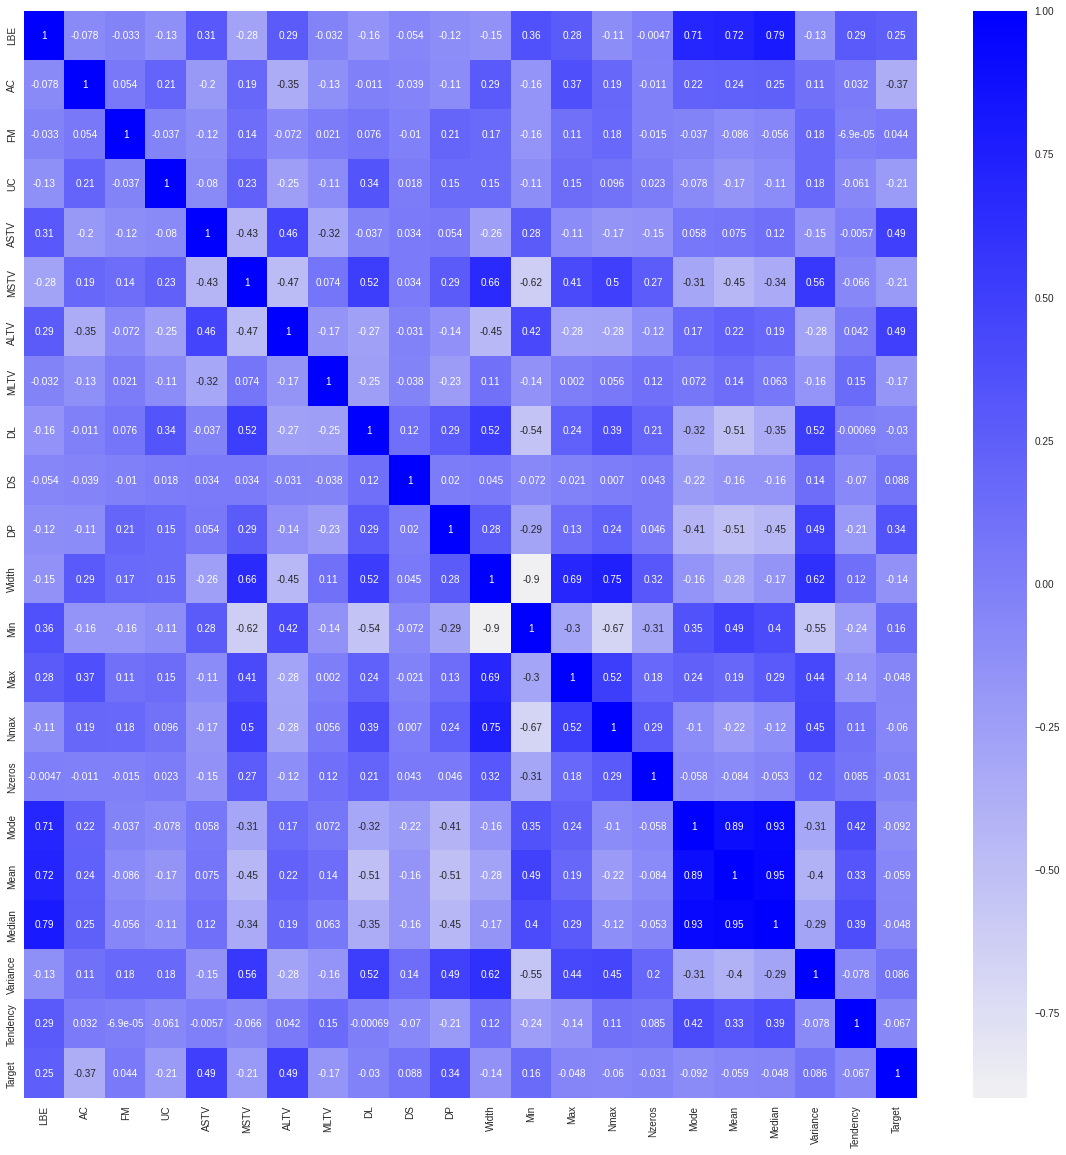

In [ ]:
plt.figure(figsize=(20,20)) 
corr = data.corr() 
cmap = sns.color_palette("light:b", as_cmap=True) 
sns.heatmap(corr, annot = True, cmap = cmap)

Como se observa en el mapa de calor, las variables con un nivel de correlación con el target más elevado son `ASTV` (porcentaje de tiempo con variabilidad anormal a corto plazo), `ALTV`(porcentaje de tiempo con variabilidad anormal a largo plazo), `AC`(número de aceleraciones por minuto) con correlación negativa y `DP` (número de desaceleraciones prolongadas por segundo).

Tampoco podemos dejar de lado la existencia de variables explicativas relacionadas entre sí, como es el caso de de la variable `Min` relacionada con `Width`, con un coeficiente de correlación de -0.9, o la variable `Min` con `MSTV` (-0.62), o con `Nmax` (-0.67). Recordemos que la hipotesis de partida para del algoritmo Naive Bayes es precisamente que las variables explicativas no estén muy relacionadas entre sí. En principio, a nivel general, no parece que pueda ocasionarnos muchos problemas la existencia de un poco de colinealidad, pero debemos tener en cuenta que existen algunas variables explicativas muy correlacionadas. 

#Fase 2: Muestreo: subconjunto de entrenamiento y test

A continuación, antes de proceder a la modelización, realizaremos un muestreo donde extraeremos del conjunto total de datos dos subconjuntos, uno para el entrenamiento del algoritmo y otro para el testeo o validazión. 

Lo normal es elegir varios tipos de subconjuntos de entrenamiento y test, no solamente quedarnos con una partición, ya que es posible que haya distintas formas de dividir el conjunto de datos que den mejores resultados. En el caso que nos ocupa, trabajaremo con el 60% de las observaciones para el subconjunto de entrenamiento y con el 40% restantes para el subconjunto de test:

In [ ]:
from sklearn.model_selection import train_test_split
x = data.loc[:, data.columns != "Target"]
y= data.loc [:,data.columns == "Target"]

x_train, x_test, y_train, y_test = train_test_split (x, y,
                                                     test_size = 0.40, random_state = 0)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 1716 to 1653
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LBE       1275 non-null   int64  
 1   AC        1275 non-null   int64  
 2   FM        1275 non-null   int64  
 3   UC        1275 non-null   int64  
 4   ASTV      1275 non-null   int64  
 5   MSTV      1275 non-null   float64
 6   ALTV      1275 non-null   int64  
 7   MLTV      1275 non-null   float64
 8   DL        1275 non-null   int64  
 9   DS        1275 non-null   int64  
 10  DP        1275 non-null   int64  
 11  Width     1275 non-null   int64  
 12  Min       1275 non-null   int64  
 13  Max       1275 non-null   int64  
 14  Nmax      1275 non-null   int64  
 15  Nzeros    1275 non-null   int64  
 16  Mode      1275 non-null   int64  
 17  Mean      1275 non-null   int64  
 18  Median    1275 non-null   int64  
 19  Variance  1275 non-null   int64  
 20  Tendency  1275 non-null   i

Como vemos, si pedimos información sobre el conjunto de datos de la variable `x_train`, vemos que el número de observaciones es 1275, justamente el 60% de las observaciones. Como ya hemos dicho, este porcentaje puede ser modificado o no dependiendo, por ejemplo, de la existencia de sobreajuste. 

#Fase 3: Ajuste del algoritmo Naive Bayes

En el caso que nos ocupa, al ser la mayoría de las variables explicativas variables de tipo continua, tendremos que elegir la familia gaussiana para operar con Naive Bayes. Una vez ya hemos definido el conjunto de entrenamiento y de test en la fase de muestreo, procedemos a la modelización:



In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
modelNB = gnb.fit(x_train, y_train.values.ravel())
y_pred_train = modelNB.predict_proba(x_train)
y_pred_test = modelNB.predict_proba(x_test)
print(y_pred_train)

[[1.00000000e+00 9.87834636e-50]
 [9.99999821e-01 1.79307698e-07]
 [9.99864975e-01 1.35024570e-04]
 ...
 [9.99998899e-01 1.10055094e-06]
 [1.00000000e+00 3.99300304e-10]
 [8.62950885e-01 1.37049115e-01]]


Lo que vemos al visualizar la variable creada `y_pred_test`son las probabilidades predichas por el modelo asociadas a cada categoría de la variable `Target`. Esto nos servirá posteriormente para la validación del modelo con la curva ROC.

#Fase 4: Ajuste del algoritmo de Support Vector Machine

Con el conjunto de datos de test y de entrenamiento obtenidos anteriormente en el segundo sprint, procederemos a su ajuste. En primer lugar, importamos los paquetes necesarios para llevar a cabo el modelo además de los ya cargados en los sprints anteriores:

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


Pasamos al ajuste del modelo del algoritmo. Estableceremos, en primer lugar, unos hiperparámetros iniciales para llevar a cabo un ajuste SVM lineal. Posteriormente, veremos cómo elegir la mejor combinación de hiperparámetros.

In [ ]:
svmLineal = svm.SVC(C = 1, kernel = 'linear',
                    degree = 1,
                    probability = True)
#El valor de "C" hace referencia a la regularización
#El valor de "kernel" es la transformación que se aplica a las variables
#El degree es el grado del polinomio. Como es lineal, en este caso da igual ponerlo.
#Con "probability = True" obtenemos una probabilidad por cada clase

svmLineal.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, degree=1, kernel='linear', probability=True)

Una vez ajustados los modelos correspondientes a los dos algoritmos, pasamos a su validación con la curva ROC y la comparación entre ambos.

#Fase 5: Validación del algoritmo Naive Bayes y SVM y comparación

##Validación de Naive Bayes con curva ROC

Especificamos las variables para la creación de la curva ROC y el AUC, tanto en la parte del entrenamiento como en la parte de test:

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

#fpr = false positive rate
#tpr = true positive rate
fpr_train, tpr_train, _ = roc_curve (y_train, y_pred_train[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test[:,1])
roc_auc_test = auc(fpr_test, tpr_test)

Una vez definidas las variables correspondientes al subconjunto de entrenamiento y de test, pasamos a la graficación de la curva ROC:

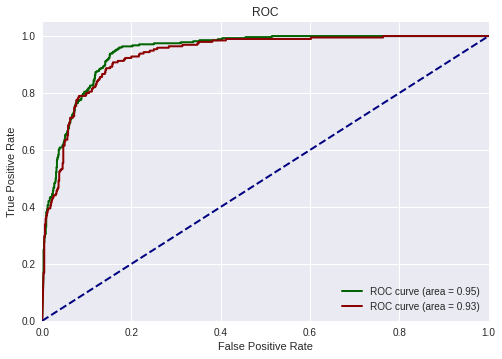

In [ ]:
plt.figure()
lw = 2

plt.plot(fpr_train, tpr_train, color = "darkgreen", lw=lw, 
          label = "ROC curve (area = %0.2f)" % roc_auc_train)
plt.plot(fpr_test,tpr_test, color = "darkred", lw=lw,
         label = "ROC curve (area = %0.2f)" % roc_auc_test)

plt.plot([0,1], [0, 1], color = "navy", lw=lw, linestyle = "--")
plt.xlim([0.0, 1.0])
plt.ylim ([0.0, 1.05])
plt.xlabel ("False Positive Rate")
plt.ylabel ("True Positive Rate")
plt.title ("ROC")
plt.legend(loc = "lower right")
plt.show()

Como vemos, hemos obtenido un área bajo la curva de 0.95 para el conjunto de entrnamiento y de 0.93 para el conjunto de test, lo que significa que nuestro modelo posee un gran poder predictivo, pues una curva de valor 1 significaría que estamos ante un modelo con una capacidad predictiva perfecta.

Cabe destacar que existe un poco de sobreajuste, algo que podemos ver en la diferencia de 0.02 en el área bajo la curva entre el subconjunto de entrenamiento y test y visualmente en algunos puntos donde las curvas se separan. Igualmente, no es un sobreajuste demasiado llamativo como para tener que tomar medidas al respecto.

##Validación del modelo SVM con curva ROC y AUC

Especificamos las variables para la creación de la curva ROC y el AUC, tanto en la parte del entrenamiento como en la parte de test:

In [ ]:
y_proba_train_svm = svmLineal.predict_proba(x_train)
y_proba_test_svm = svmLineal.predict_proba(x_test)

In [ ]:
#Train
fpr_train_svm, tpr_train_svm, _ = roc_curve(y_train, y_proba_train_svm [:, 1])
roc_auc_train_svm = auc(fpr_train_svm, tpr_train_svm)

#Test
fpr_test_svm, tpr_test_svm,_ = roc_curve(y_test, y_proba_test_svm [:, 1])
roc_auc_test_svm = auc(fpr_test_svm, tpr_test_svm)

Definimos la curva ROC y el AUC con las variables anteriormente especificadas tanto para entrenamiento como para test:

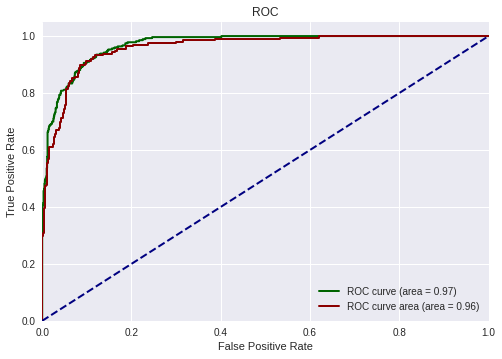

In [ ]:
plt.figure()
lw = 2

plt.plot(fpr_train_svm, tpr_train_svm, color = 'darkgreen', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc_train_svm,)
plt.plot(fpr_test_svm, tpr_test_svm, color = 'darkred', lw = lw, label = 'ROC curve area (area = %0.2f)' % roc_auc_test_svm,)

plt.plot([0,1], [0,1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc = 'lower right')
plt.show()

Podemos decir que el ajuste es muy bueno y que mejora con respecto al anterior ajuste de SVM. Esta vez el conjunto de entrenamiento tiene un AUC de 0.97 y el AUC de test tiene un 0.96. Claramente es una mejora en la capacidad prediectiva con respecto al modelo de Naive Bayes, y tenemos menos sobreajuste, siendo la diferencia de AUC entre entrenamiento y test es solamente de 0.01. 

##Comparación del resultado obtenido de SVM con la curva ROC y AUC obtenido con Naive Bayes

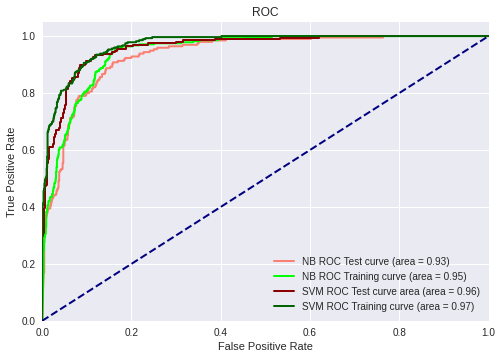

In [ ]:
plt.figure()
lw = 2

plt.plot(fpr_test,tpr_test, color = "salmon", lw=lw, label = "NB ROC Test curve (area = %0.2f)" % roc_auc_test)
plt.plot(fpr_train, tpr_train, color = "lime", lw=lw, 
          label = "NB ROC Training curve (area = %0.2f)" % roc_auc_train)
plt.plot(fpr_test_svm, tpr_test_svm, color = 'darkred', lw = lw, label = 'SVM ROC Test curve area (area = %0.2f)' % roc_auc_test_svm,)
plt.plot(fpr_train_svm, tpr_train_svm, color = 'darkgreen', lw = lw, label = 'SVM ROC Training curve (area = %0.2f)' % roc_auc_train_svm,)


plt.plot([0,1], [0,1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Como vemos, esta vez el resultado obtenido con SVM es mejor que el obtenido con Naive Bayes. Concretamente, podemos ver que existe menor sobreajuste en el modelo de SVM que en el de Naive Bayes, al mismo tiempo que tenemos un mejor ajuste tanto con el conjunto de entrenamiento como con el de test (una diferencia de 0.02 de AUC en el conjunto de entrenamiento y una diferencia de 0.03 de AUC en el conjunto de test). 

#Fase aidicional: Mejor combinación de hiperparámetros para el algoritmo SVM utilizando la función Grid Search de Scikit Learn

Ante algoritmos complejos como el caso de SVM, donde tenemos un amplio abaico de hiperparámetros, poder conocer la mejor combinación de los mismos para ejecutar el mejor modelo posible es algo que nos ahorra mucho tiempo. Con la función GridSearchCV podemos hacerlo fácilmente. 

A continuación, se especifica para el algoritmo SVM una combinación de hiperparámetros para comprobar cuál es la mejor:

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [
              {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [0.1,1,10]},
              {'kernel':['linear'], 'C':[0.1,1,10]},
              {'kernel':['poly'], 'C':[0.1,1,10], 'degree':[2,3,4]}
]

grid = GridSearchCV(
    estimator = SVC(),
    param_grid = param_grid,
    scoring = 'roc_auc',
    n_jobs =-1,
    cv = 3,
    verbose = 0,
    return_train_score = True
)
grid.fit(X = x_train, y = y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                          'kernel': ['poly']}],
             return_train_score=True, scoring='roc_auc')

In [ ]:
results = pd.DataFrame(grid.cv_results_)
results.filter(regex = '(param.*|mean_t|std_t)')\
.drop(columns = 'params')\
.sort_values('mean_test_score', ascending = False)\
.head(10)

,param_C,param_gamma,param_kernel,param_degree,mean_test_score,std_test_score,mean_train_score,std_train_score
7,1,NaN,linear,NaN,0.961140,0.009888,0.971758,0.004486
5,10,0.0001,rbf,NaN,0.960422,0.005075,0.982315,0.001190
6,0.1,NaN,linear,NaN,0.959171,0.011102,0.968995,0.006302
8,10,NaN,linear,NaN,0.957626,0.012830,0.971892,0.004544
3,1,0.0001,rbf,NaN,0.949020,0.008383,0.962050,0.001849
4,10,0.001,rbf,NaN,0.947823,0.005539,0.998932,0.000856
17,10,NaN,poly,4,0.945734,0.011929,0.961248,0.005056
2,1,0.001,rbf,NaN,0.944961,0.004728,0.988773,0.000816
16,10,NaN,poly,3,0.942557,0.010176,0.952633,0.005858
15,10,NaN,poly,2,0.937084,0.009289,0.944851,0.004812


Como vemos, las mejores medidas tanto para el conjunto de test como para el conjunto de entrenamento se consiguen con un kernel lineal y un parámetro C = 1. Vemos que también es posible aplicar otras combinaciones de forma que tampoco difiera demasiado el resultado, pero tenemos que tener mucho cuidado con el aumento del sobreajuste. En el caso de de la combinación número 4 vemos que tenemos una diferencia entre el conjunto de test y de entrenamiento de casi 0.05. 